In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Dogecoin.csv")

In [3]:
df.head(3)

,Date,Open,High,Low,Close,Volume,Market Cap
0,14-06-2021,0.323903,0.336927,0.091273,0.327787,1.822191e+09,4.261938e+10
1,13-06-2021,0.312485,0.330026,0.307892,0.324382,1.484851e+09,4.217219e+10
2,12-06-2021,0.318893,0.319332,0.301804,0.312084,1.605634e+09,4.056906e+10


In [4]:
df.isnull().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [5]:
df.drop(['Date'],axis=1,inplace=True)

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

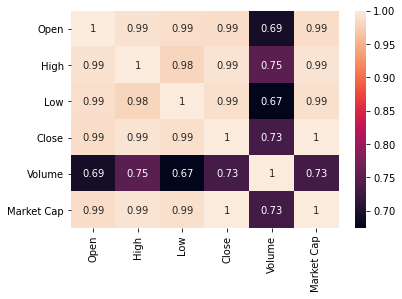

In [7]:
sns.heatmap(df.corr(), annot = True)

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2739.000000,2739.000000,2739.000000,2739.000000,2.739000e+03,2.739000e+03
mean,0.011684,0.012892,0.010461,0.011808,4.161887e+08,1.505778e+09
std,0.058427,0.065340,0.051302,0.058791,2.808463e+09,7.621650e+09
min,0.000087,0.000089,0.000085,0.000087,0.000000e+00,1.509085e+06
25%,0.000226,0.000231,0.000222,0.000226,2.496250e+05,2.333632e+07
50%,0.001810,0.001890,0.001722,0.001812,5.302360e+06,2.060914e+08
75%,0.002838,0.002947,0.002766,0.002841,4.801251e+07,3.444158e+08
max,0.687801,0.737567,0.608168,0.684777,6.941068e+10,8.868082e+10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Open        2739 non-null   float64
 1   High        2739 non-null   float64
 2   Low         2739 non-null   float64
 3   Close       2739 non-null   float64
 4   Volume      2739 non-null   float64
 5   Market Cap  2739 non-null   float64
dtypes: float64(6)
memory usage: 128.5 KB


In [11]:
import matplotlib.pyplot as plt

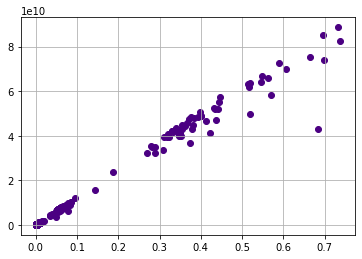

In [12]:
plt.scatter(df['High'], df['Market Cap'], color='indigo')
plt.grid(True)
plt.show()

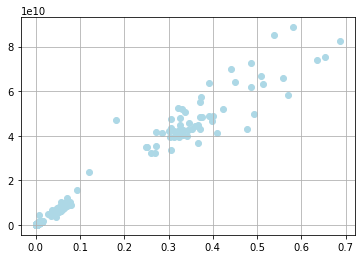

In [13]:
plt.scatter(df['Open'], df['Market Cap'], color='lightblue')
plt.grid(True)
plt.show()

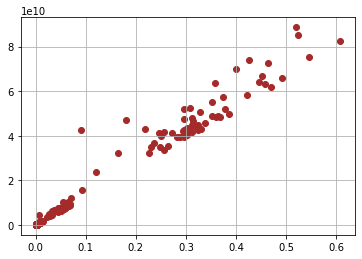

In [14]:
plt.scatter(df['Low'], df['Market Cap'], color='brown')
plt.grid(True)
plt.show()

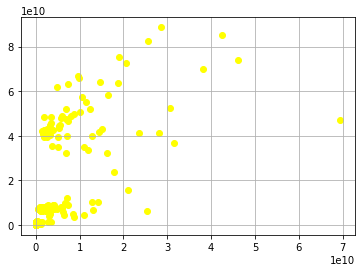

In [15]:
plt.scatter(df['Volume'], df['Market Cap'], color='yellow')
plt.grid(True)
plt.show()

In [16]:
X=df.drop(["Market Cap"], axis=1)

y=df["Market Cap"]

In [17]:
from sklearn import preprocessing
from sklearn import utils

In [18]:
lab_enc = preprocessing.LabelEncoder()
encoded = lab_enc.fit_transform(y)

In [19]:
print(utils.multiclass.type_of_target(y))

continuous


In [20]:
print(utils.multiclass.type_of_target(y.astype('int')))

multiclass


In [21]:
print(utils.multiclass.type_of_target(encoded))

multiclass


### MODEL

In [22]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [88]:
regr = linear_model.LinearRegression()
regr.fit(X, encoded)

LinearRegression()

In [89]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 1316.5569742605282
Coefficients: 
 [ 4.13315994e+03 -6.33403703e+03  5.59306810e+03  1.23120757e+03
  3.06736183e-08]


In [90]:
X = sm.add_constant(X)

In [91]:
model = sm.OLS(encoded, X).fit()
predictions = model.predict(X) 

In [92]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     62.45
Date:                Tue, 22 Jun 2021   Prob (F-statistic):           7.87e-62
Time:                        16:40:27   Log-Likelihood:                -22015.
No. Observations:                2739   AIC:                         4.404e+04
Df Residuals:                    2733   BIC:                         4.408e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1316.5573     14.633     89.970      0.0

In [23]:
model1 =  LinearRegression()

In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [25]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [39]:
X_train, X_test, encoded_train, encoded_test = train_test_split(X, encoded, train_size=0.7)

In [40]:
result = []
model1.fit(X_train, encoded_train)
result.append(model1.score(X_test, encoded_test))
result

[0.10024347591349847]

In [41]:
y_pred = model1.predict(X_test)
df1=pd.DataFrame({'Predicted values':y_pred,'Actual values':encoded_test})
df1

,Predicted values,Actual values
0,1325.531820,1004
1,1325.489932,962
2,1325.357337,558
3,1325.436343,977
4,1334.802758,1538
...,...,...
817,1338.072380,2135
818,1325.592056,1068
819,1336.982130,1995
820,1325.247303,530


In [99]:
new_input = [[35555.790140, 39322.780212, 34864.109940, 39097.860897, 4.066911e+10]]

In [100]:
new_output = regr.predict(new_input)
new_output

array([1.41023309e+08])

In [101]:
model1.score(X_test, encoded_test)

0.10310456970734339

In [42]:
import pickle

In [43]:
pkl_file= open('dogecoinf.pkl',"wb")

In [44]:
pickle.dump(model1,pkl_file)

In [45]:
pkl_file.close()